In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import load_data_with_columns, date_to_int

In [2]:
DATAFOLDER = '../data/'
character_metadata = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')
movie_metadata = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')

movie_metadata = date_to_int(movie_metadata, 'movie_release_date')

character_metadata = date_to_int(character_metadata, 'movie_release_date')

display(movie_metadata.sample(10))
display(character_metadata.sample(10))


,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
36317,34012169,/m/0hqz_ll,Mohan,1947.0,NaN,NaN,[Hindi Language],[India],[]
51404,533378,/m/02mfrg,Macbeth,1971.0,NaN,141.0,[English Language],"[United States of America, United Kingdom]","[Costume drama, Drama, Film adaptation]"
32067,10617098,/m/02qkbs6,Bees Saal Baad,1962.0,NaN,NaN,[Hindi Language],[India],[Bollywood]
73154,20657240,/m/0520jw3,Demetri Martin. Person.,2007.0,NaN,60.0,[],[United States of America],"[Concert film, Comedy, Stand-up comedy]"
43880,11617679,/m/02rlq37,Showdown,1998.0,NaN,97.0,[English Language],[United States of America],"[Short Film, Crime Fiction, Drama]"
44885,31724895,/m/0gmfh4c,"Her Excellency, the Governor",1917.0,NaN,NaN,[],[],[Silent film]
72290,33264013,/m/0crrg2d,Strawberries in the Supermarket,2003.0,NaN,83.0,"[Italian Language, German Language, Serbian la...","[Serbia and Montenegro, Italy, Yugoslavia, Ger...","[Romantic comedy, World cinema, Drama, Comedy,..."
73997,12677839,/m/02x04wy,Samskara,1970.0,NaN,113.0,[Kannada Language],[India],[Drama]
38991,28479151,/m/0crhq4s,Bør Børson II,1976.0,NaN,101.0,[Norwegian Language],[Norway],"[Musical, Comedy]"
69708,206879,/m/01dc8g,Star Trek III: The Search for Spock,1984.0,87000000.0,105.0,[English Language],[United States of America],"[Science Fiction, Family Film, Adventure]"


,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
8618,15827716,/m/03qcrw1,1984.0,Fimka,NaN,NaN,NaN,NaN,Aleksandra Zakharova,NaN,/m/0b_wh5k,/m/0b_wh5n,/m/0b_wh5w
70126,8885678,/m/027n93z,1999.0,Bean,NaN,M,NaN,NaN,Ben Waters,NaN,/m/0jqf90w,/m/0jqf90z,/m/0jqf915
114958,23734853,/m/06_vlp9,2010.0,Hotel Room Neighbor,1981-04-06,F,1.67,NaN,Eliza Coupe,29.0,/m/0cpnkfl,/m/0h340f9,/m/05c1k2t
298947,534812,/m/02ml29,1990.0,Joanne Simpson,1952-12-20,F,1.70,NaN,Jenny Agutter,37.0,/m/0jwbbr,/m/0h26jgr,/m/01pcql
257637,407293,/m/024lgy,1955.0,NaN,1914-01-30,M,1.85,NaN,John Ireland,40.0,/m/02vd68h,NaN,/m/0561jd
353728,9830229,/m/02ptczs,1968.0,Mrs. Gilmore,1896-06-07,F,NaN,NaN,Hope Summers,NaN,/m/0h5sw35,/m/0h5sw8p,/m/0fjndh
334811,9735679,/m/02pqm9r,1974.0,Sir Charles Furness,1912-02-25,M,NaN,NaN,Richard Wattis,62.0,/m/0j9j83j,/m/0j9j83m,/m/0cl6wz
90741,33233116,/m/0cryq_4,2009.0,NaN,NaN,M,NaN,NaN,Evan Williams,NaN,/m/0gcxdk9,NaN,/m/076xd96
353900,21652487,/m/05mvcjs,2009.0,Nazar,1968-06-10,M,NaN,/m/0dryh9k,Salim Kumar,41.0,/m/0h801mm,/m/0h801mp,/m/0288crq
288794,31738801,/m/0gtx5fd,2006.0,NaN,1983-03-28,M,NaN,NaN,Shakib Khan,22.0,/m/0h9ftx6,NaN,/m/0cnz4h3


In [3]:
movie_metadata = movie_metadata[movie_metadata['movie_release_date'] > 1850]

In [4]:
def release_by_genre(data, genre='Silent'):

    genre_films = data[movie_metadata['genres'].str.contains(genre)]

    films_by_year = data[movie_metadata['movie_release_date'].isin(genre_films['movie_release_date'])].groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'total_nb_films': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = genre_films.groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'frequency': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = pd.concat((genre_films_by_year, films_by_year), axis = 1)

    return genre_films, genre_films_by_year

def plot_release_by_genre(genre_films_by_year, genre = 'Silent'):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(genre_films_by_year.index, genre_films_by_year.frequency, color = color)
    ax1.set_xlabel('Release year')
    ax1.set_ylabel('number of movies released', color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    if genre == None:
        ax1.set_title('Genre films released over the years')
    else:
        ax1.set_title('{} films released over the years'.format(genre))

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(genre_films_by_year.index, genre_films_by_year.frequency/genre_films_by_year.total_nb_films, ls = '-.', color = color)
    ax2.set_ylabel('proportion of silent movies released', color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yticks(ticks = np.arange(0, 1.2, 0.2), labels = [str(int(p*100))+'%' for p in np.arange(0, 1.2, 0.2)])

    fig.show()

def select_non_genre(genre, total):
    res = []
    for y in total:
        if ~np.isin(y, genre):
             res.append(y)
    return np.asarray(res)


def actors_by_genre(data_character, genre_films, genre = 'Silent', plot_samples = False, nb_samples=15):

    if genre == 'Silent':
        date = 1940
    elif genre == 'Black-and-white':
        date = 10**(12)

    #only movies that are silent and released before 1940
    data_character_filt = data_character[data_character['movie_wikipedia_id'].isin(genre_films['movie_wikipedia_id'])]
    data_character_filt = data_character_filt[data_character_filt['movie_release_date'] < date]

    #only actors that appear in silent movies and before 1940, but appearances are limited to silent movies
    characters_by_actor = data_character_filt.groupby(by = 'actor_name').apply(lambda x: pd.Series({'genre_appearances' : x['movie_release_date'].values}))

    #only movies that feature an actor that has played at least once in a silent movie
    movies_genre_actors = data_character[data_character['actor_name'].isin(characters_by_actor.index)]
    #only actors that appear in silent movies, but appearances are not limited to silent movies
    characters_by_actor_all = movies_genre_actors.groupby(by = 'actor_name').apply(lambda x: pd.Series({'total_appearances' : x['movie_release_date'].values}))

    characters_by_actor = pd.concat((characters_by_actor, characters_by_actor_all), axis = 1)

    characters_by_actor['non_genre_appearances'] = characters_by_actor.apply(lambda x: select_non_genre(x['genre_appearances'], x['total_appearances']), axis = 1)

    #Add columns indicating the number of appearances
    characters_by_actor['nb_genre_appearances'] = characters_by_actor['genre_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_total_appearances'] = characters_by_actor['total_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_non_genre_appearances'] = characters_by_actor['non_genre_appearances'].apply(lambda x: x.shape[0])

    if plot_samples:

        # Keep actors who appear at least in 5 silent movies
        characters_by_actor_filt = characters_by_actor[characters_by_actor['nb_genre_appearances'] >= 5]
        years = [int(movies_genre_actors.movie_release_date.min()), int(movies_genre_actors.movie_release_date.max())]
        sample = characters_by_actor_filt.sample(nb_samples)

        fig, axes = plt.subplots(nb_samples, figsize = (7, 2*nb_samples), sharex = True)

        for i in range(nb_samples):

            axes[i].hist(sample.non_genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = 'non-{} films'.format(genre),)
            axes[i].hist(sample.genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = '{} films'.format(genre))
            axes[i].set_title(sample.index[i])
            axes[i].legend()
        fig.show()
    
    return characters_by_actor

    
def plot_distrib_actors_by_genre(characters_by_actor, genre = 'Silent'):

    plt.figure()

    plt.hist(characters_by_actor.nb_total_appearances, label = 'All films', bins = 100, range = (0, 100), histtype= 'step')
    plt.hist(characters_by_actor.nb_genre_appearances, label = '{} films'.format(genre), bins = 100, range = (0, 100), histtype= 'step')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of movies released per actor')
    plt.ylabel('Number of actors')
    plt.title('Distribution of number of movies released by an actor that has appeared in at least one {} film'.format(genre))
    plt.legend()
    plt.show()

    

In [5]:
mute_films, mute_films_by_year = release_by_genre(movie_metadata)
plot_release_by_genre(mute_films_by_year)

actors_silent = actors_by_genre(character_metadata, mute_films, plot_samples=True)
plot_distrib_actors_by_genre(actors_silent)

KeyError: "None of [Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n       ...\n       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n      dtype='float64', length=74838)] are in the [columns]"

In [ ]:
display(actors_silent)

,genre_appearances,total_appearances,non_genre_appearances,nb_genre_appearances,nb_total_appearances,nb_non_genre_appearances
actor_name,,,,,,
Cesarine Prinz\t,[1922.0],"[1926.0, 1922.0]",[1926.0],1,2,1
'Big Bill' Giddinger,[1911.0],[1911.0],[],1,1,0
A. Arnold,[1929.0],[1929.0],[],1,1,0
A. B. Imeson,[1923.0],[1923.0],[],1,1,0
A. Bromley Davenport,[1923.0],"[1923.0, 1933.0, 1938.0, 1931.0, 1932.0]","[1933.0, 1938.0, 1931.0, 1932.0]",1,5,4
...,...,...,...,...,...,...
Zoltán Szerémy,"[1917.0, 1918.0]","[1917.0, 1918.0]",[],2,2,0
rambaldo de goudron,[1915.0],[1915.0],[],1,1,0
Ángela Henao,[1925.0],[1925.0],[],1,1,0


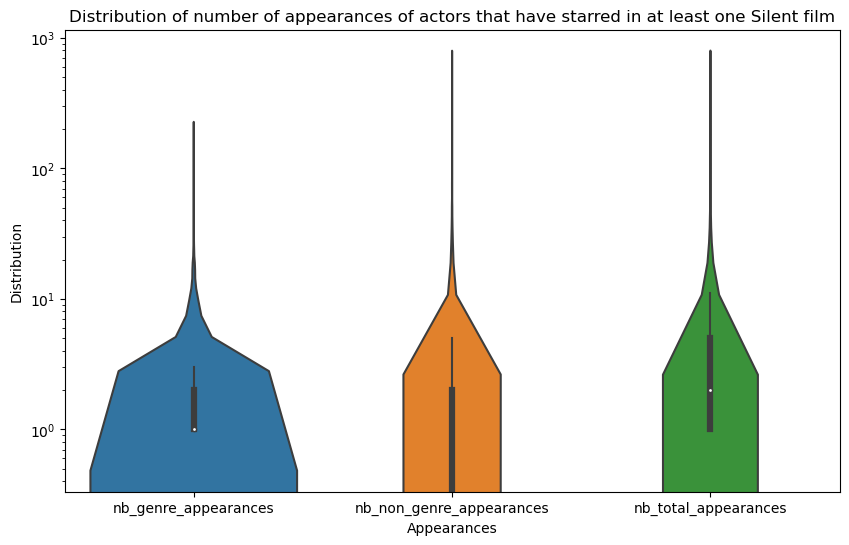

In [ ]:
#Create dataframe suitable to plot violin plot for each column
df = pd.melt(actors_silent[['nb_genre_appearances', 'nb_non_genre_appearances', 'nb_total_appearances']], var_name='Appearances', value_name='Distribution')

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.violinplot(x='Appearances', y='Distribution', data=df)
plt.title('Distribution of number of appearances of actors that have starred in at least one Silent film')
plt.yscale('log')
plt.show()


In [ ]:
# Create a new Dataframe containing the number of appearances of eah actor per year (1888-2015)

def test(x):
    years = []
    for year in x:
        if ~np.isin(year, years):
            years.append(year)
    return years

def test_count(x, range):
    years_appearance = test(x)
    count = []
    for year in range:
        if np.isin(year, years_appearance):
            count.append(x.tolist().count(year))
        else:
            count.append(0)
    return np.asarray(count)

years = range(int(movie_metadata.movie_release_date.min()), int(movie_metadata.movie_release_date.max()))

new_df = pd.DataFrame({'count_silent' : actors_silent['genre_appearances'].apply(lambda x : test_count(x, years)),
                       'count_non_silent' : actors_silent['non_genre_appearances'].apply(lambda x : test_count(x, years))})


In [ ]:
display(new_df)

,count_silent,count_non_silent
actor_name,,
Cesarine Prinz\t,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
'Big Bill' Giddinger,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Arnold,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. B. Imeson,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Bromley Davenport,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
Zoltán Szerémy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
rambaldo de goudron,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Ángela Henao,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Text(0.5, 1.0, 'Mean number of appearances across actors that have starred in at least one Silent film')

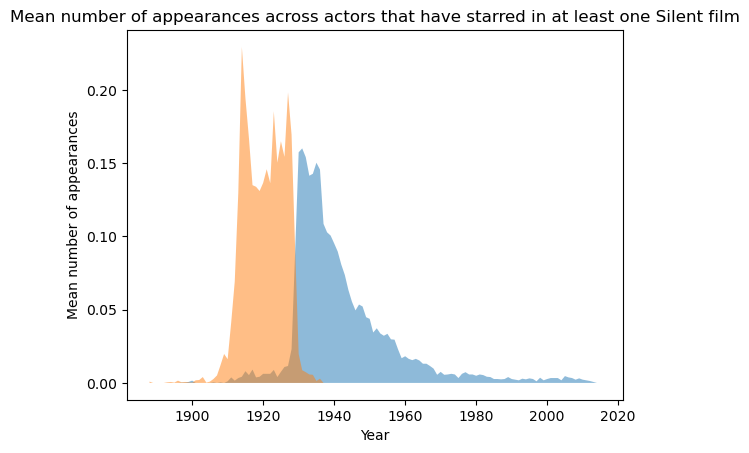

In [ ]:
#Plot the mean of appearances of actors (that have starred in at least one Silent film) per year

mean_silent_years = np.mean(np.stack(new_df.count_silent.values), axis = 0)
mean_non_silent_years = np.mean(np.stack(new_df.count_non_silent.values), axis = 0)

plt.fill_between(years, mean_non_silent_years, alpha = 0.5, label = 'Non-Silent films')
plt.fill_between(years, mean_silent_years, alpha = 0.5, label = 'Silent films')
plt.ylabel('Mean number of appearances')
plt.xlabel('Year')
plt.title('Mean number of appearances across actors that have starred in at least one Silent film')


### Note: I am not sure I should use the mean since the distribution is heavy-tailed. But if I use the median, I get 0.... bc a lot of datapoints are zero

/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_1701/2431968266.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_1701/2431968266.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


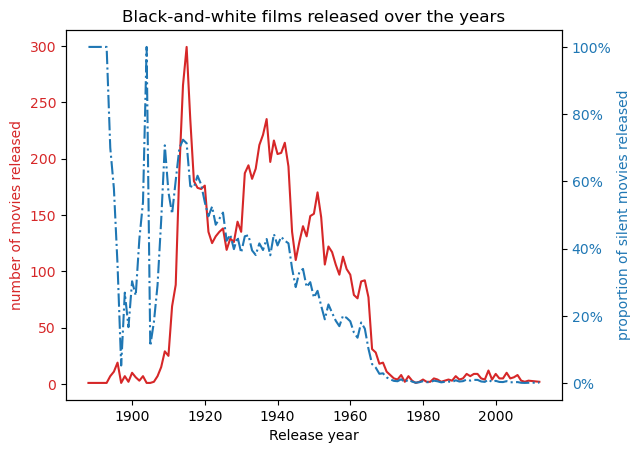

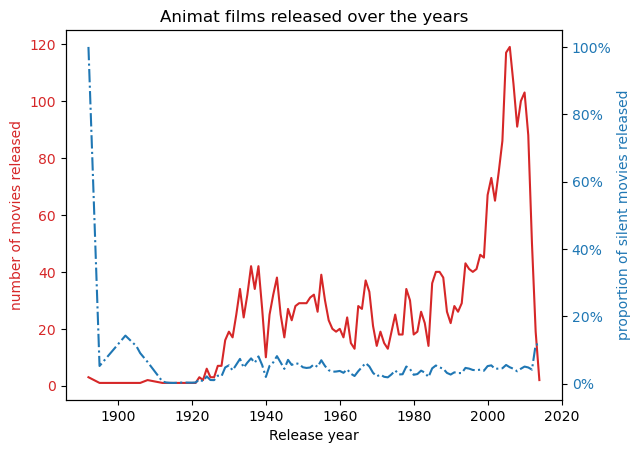

In [ ]:
bw_films, bw_films_by_year = release_by_genre(movie_metadata, 'Black-and-white')
plot_release_by_genre(bw_films_by_year, 'Black-and-white')

anim_films, anim_films_by_year = release_by_genre(movie_metadata, 'Animat')
plot_release_by_genre(anim_films_by_year, 'Animat')